In [1]:
!pip install pylibkriging

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.0 MB 5.3 MB/s 


* data: 5x[0,1] -> 5x[0.030241,0.772403]
* trend constant (est.): 0.469711
* variance (est.): 0.0786614
* covariance:
  * kernel: gauss
  * range (est.): 0.234781
  * fit:
    * objective: LL
    * optim: BFGS



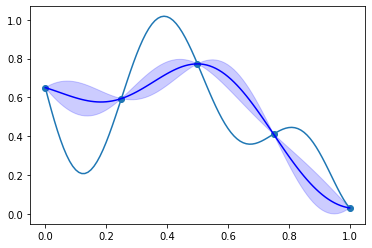

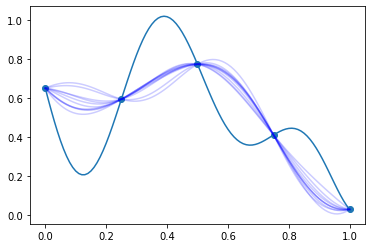

In [2]:
import numpy as np
X = [0.0, 0.25, 0.5, 0.75, 1.0]
f = lambda x: (1 - 1 / 2 * (np.sin(12 * x) / (1 + x) + 2 * np.cos(7 * x) * x ** 5 + 0.7))
y = [f(xi) for xi in X]

import pylibkriging as lk
k_py = lk.Kriging(y, X, "gauss")
print(k_py.summary())

# you can also check logLikelihood using:
# def ll(t): return k_py.logLikelihoodFun(t,False,False)[0]
# t = np.arange(0,1,1/99); pyplot.figure(1); pyplot.plot(t, [ll(ti) for ti in t]); pyplot.show()

x = np.linspace(0, 1, 101)
p = k_py.predict(x, True, False, False)
p = {"mean": p[0], "stdev": p[1], "cov": p[2]}

import matplotlib.pyplot as pyplot
pyplot.figure(1)
pyplot.plot(x, [f(xi) for xi in x])
pyplot.scatter(X, [f(xi) for xi in X])
pyplot.plot(x, p['mean'], color='blue')
pyplot.fill(np.concatenate((x, np.flip(x))),
            np.concatenate((p['mean'] - 2 * p['stdev'], np.flip(p['mean'] + 2 * p['stdev']))), color='blue',
            alpha=0.2)
pyplot.show()

s = k_py.simulate(10, 123, x)

pyplot.figure(2)
pyplot.plot(x, [f(xi) for xi in x])
pyplot.scatter(X, [f(xi) for xi in X])
for i in range(10):
    pyplot.plot(x, s[:, i], color='blue', alpha=0.2)
pyplot.show()